In [460]:
from pandas import read_excel, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [369]:
df = read_excel("IIMK_DSAI_W12_Optional Assignment 12.1_Data Set.xlsm")

In [370]:
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [371]:
print(df.tail())

        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [372]:
# Check if there are any duplicate values in dataset
print(sum(df.duplicated()))

0


In [373]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [374]:
na_counts = DataFrame(df.isna().sum(),columns=["NA Counts"]).reset_index()
na_counts = na_counts.rename(columns={'index': 'Column Name'})
print(na_counts)

  Column Name  NA Counts
0          TV          0
1       Radio          0
2   Newspaper          0
3       Sales          0


In [375]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h1> Exploratory Data Analysis </h1>

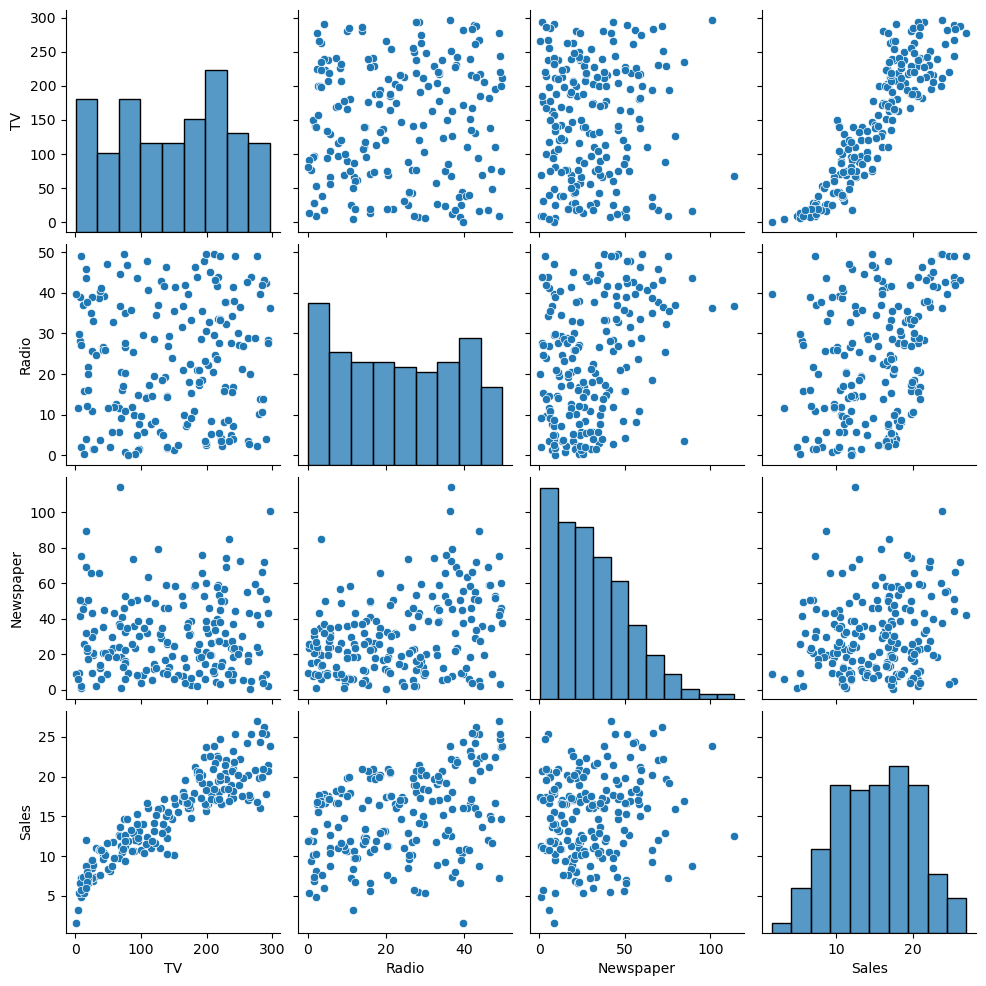

In [461]:
sns.pairplot(df)
plt.show()

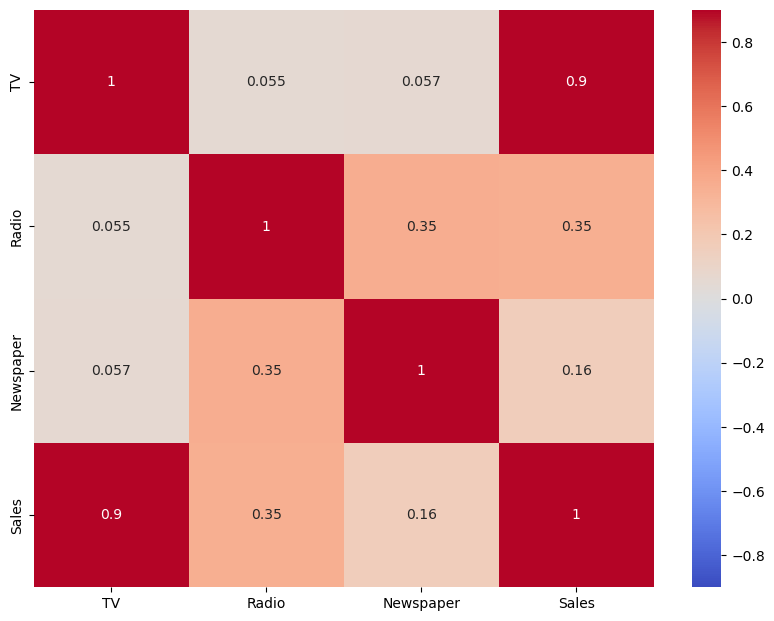

In [462]:
corr = df.corr()
norm = Normalize(vmin=-0.9, vmax=0.9)
plt.figure(figsize=(10, 7.5))
sns.heatmap(corr,
            annot=True, cmap = "coolwarm",norm = norm)
plt.show()

<h1>Simple Linear Regression</h1>

<p>I have not scaled the data as scaling or not scaling the data will not affect the OLS model</p>

In [378]:
X, y = df['TV'], df['Sales']
X = sm.add_constant(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
y_testSLR,y_trainSLR = y_test,y_train

In [379]:
print(X_train.shape)
print(X_test.shape)

(160, 2)
(40, 2)


In [380]:
# Fit the ordinary least squares (OLS) model
modelSLR = sm.OLS(y_train, X_train).fit()

In [381]:
y_predSLR = modelSLR.predict(X_test)

In [382]:
print(modelSLR.params)

const    7.047827
TV       0.055359
dtype: float64


In [383]:
# Print the summary of the regression model
modelSLR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.798   
Dependent Variable: Sales            AIC:                724.2997
Date:               2024-07-04 15:57 BIC:                730.4500
No. Observations:   160              Log-Likelihood:     -360.15 
Df Model:           1                F-statistic:        630.1   
Df Residuals:       158              Prob (F-statistic): 5.20e-57
R-squared:          0.800            Scale:              5.3472  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    7.0478      0.3698    19.0568    0.0000    6.3174    7.7783
TV       0.0554      0.0022    25.1008    0.0000    0.0510    0.0597
-----------------------------------------------------------------
Omnibus:               0.582        Durbin-Watson:          1.910
Prob(Omnibus):         0.748        Jarque-Bera (JB):       0.379
Skew:                  -0.113       Prob(JB):               0.827
Kurtosis:              3.074        Condition No.:          339  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

<p>The R2 value of 0.8 specifies that the model accounts for 80% of the variance</p>
<p>p value less than 0.05 signifies that the model is statistically significant and the R2 value is not by random chance</p>

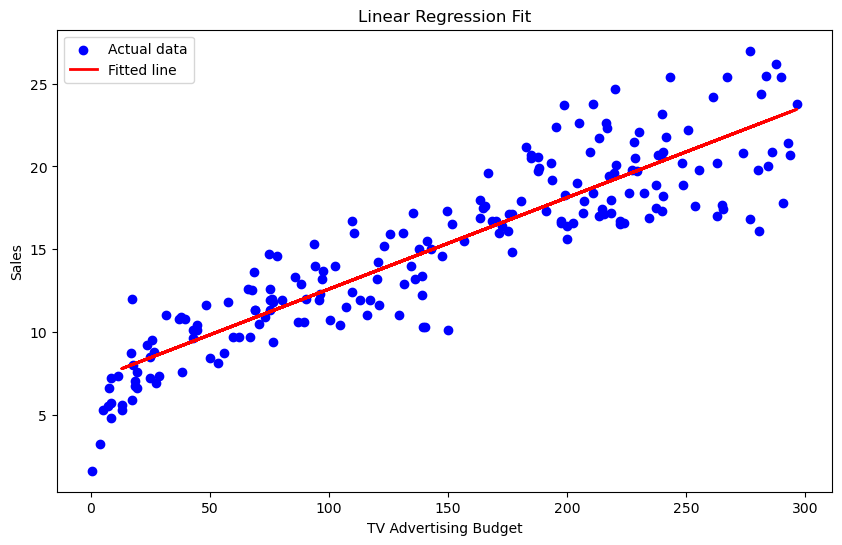

In [384]:
# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,1], y, color='blue', label='Actual data')

plt.plot(X_test.iloc[:,1], y_predSLR, color='red', linewidth=2, label='Fitted line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


<h1> Validating the assumption of the model</h1>

<h2> Check for normal distribution of residual </h2>

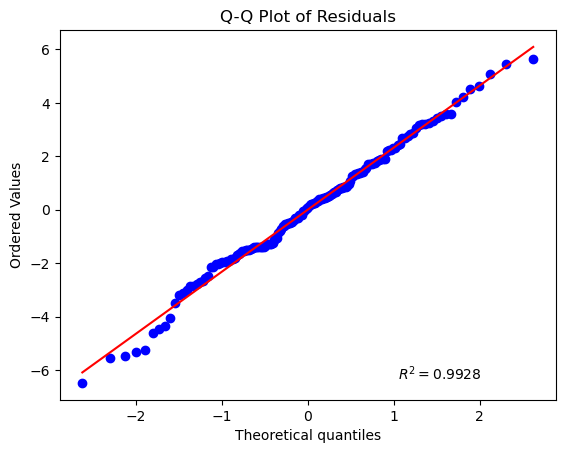

In [385]:
# Generate the Q-Q plot
stats.probplot(modelSLR.resid, plot=plt, rvalue = True)
plt.title('Q-Q Plot of Residuals')
plt.show()

<h2> Test for homoscedasticity </h2>

In [464]:
scedasticity_data = np.column_stack((modelSLR.fittedvalues,modelSLR.resid))

In [465]:
scaler = StandardScaler()
scedasticity_data = scaler.fit_transform(scedasticity_data)

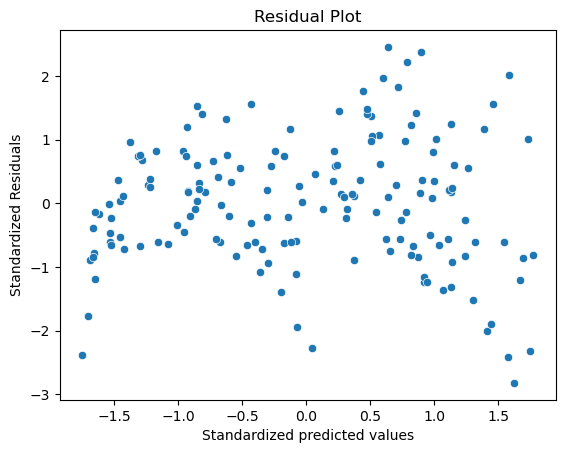

In [466]:
sns.scatterplot(x = scedasticity_data[:,0],y = scedasticity_data[:,1])
plt.title( "Residual Plot" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals")
plt.show()

<p>There is no funnel like shape in the residual plot hence data is following homoscedasticity</p>

<h2> Outlier Analysis </h2>

In [389]:
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(df['Sales'].values.reshape(-1,1))
n_outliers = (np.abs(sales_scaled) > 3).sum()
print(f"No of outliers as per z-score analysis is {n_outliers}")

No of outliers as per z-score analysis is 0


<h2> Cooks Distance </h2>

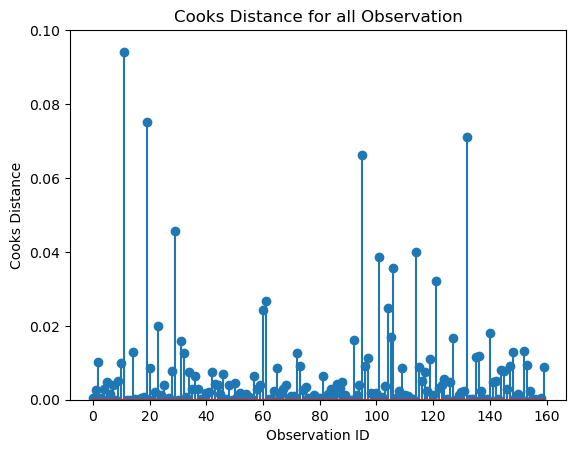

In [390]:
influence = modelSLR.get_influence()
c, p = influence.cooks_distance
plt.stem(np.arange(len(X_train)), c)
plt.title("Cooks Distance for all Observation")
plt.xlabel("Observation ID")
plt.ylabel("Cooks Distance")
plt.ylim(0,0.1)
plt.show()

<p>None of the cook distance is above 1 hence there are no outliers</p>

<h1>Multiple Linear Regression</h1>

In [391]:
X, y = df.drop('Sales', axis = 1), df['Sales']
X = sm.add_constant(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
y_testMLR, y_trainMLR = y_test, y_train

In [392]:
print(X_train.shape)
print(X_test.shape)

(160, 4)
(40, 4)


In [393]:
# Fit the ordinary least squares (OLS) model
modelMLR = sm.OLS(y_train, X_train).fit()

In [394]:
y_predMLR = modelMLR.predict(X_test)

In [395]:
print(modelMLR.params)

const        4.510329
TV           0.055608
Radio        0.104209
Newspaper    0.002547
dtype: float64


In [396]:
# Print the summary of the regression model
modelMLR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.887   
Dependent Variable: Sales            AIC:                633.2814
Date:               2024-07-04 15:57 BIC:                645.5821
No. Observations:   160              Log-Likelihood:     -312.64 
Df Model:           3                F-statistic:        417.7   
Df Residuals:       156              Prob (F-statistic): 2.64e-74
R-squared:          0.889            Scale:              2.9905  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       4.5103     0.3764   11.9813   0.0000    3.7667   5.2539
TV          0.0556     0.0016   33.7105   0.0000    0.0523   0.0589
Radio       0.1042     0.0098   10.5880   0.0000    0.0848   0.1237
Newspaper   0.0025     0.0069    0.3673   0.7139   -0.0111   0.0162
-----------------------------------------------------------------
Omnibus:              16.339       Durbin-Watson:          1.943 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       25.553
Skew:                 -0.547       Prob(JB):               0.000 
Kurtosis:             4.624        Condition No.:          470   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

<h1> Validating the assumption of the model</h1>

<h2> Check for normal distribution of residual </h2>

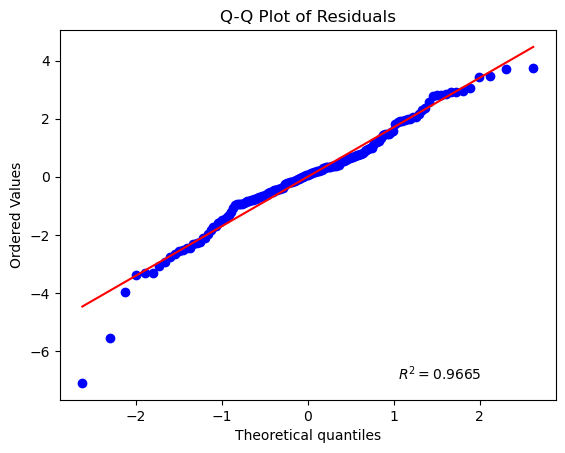

In [397]:
# Generate the Q-Q plot
stats.probplot(modelMLR.resid, plot=plt, rvalue = True)
plt.title('Q-Q Plot of Residuals')
plt.show()

<h2> Test for homoscedasticity </h2>

In [467]:
scedasticity_data = np.column_stack((modelMLR.fittedvalues,modelSLR.resid))

In [468]:
scaler = StandardScaler()
scedasticity_data = scaler.fit_transform(scedasticity_data)

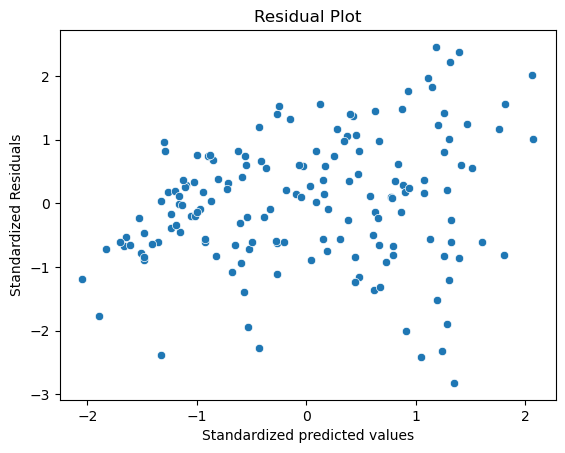

In [469]:
sns.scatterplot(x = scedasticity_data[:,0],y = scedasticity_data[:,1])
plt.title( "Residual Plot" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals")
plt.show()

<p>There is no funnel like shape in the residual plot hence data is following homoscedasticity</p>

<h2> Cooks Distance </h2>

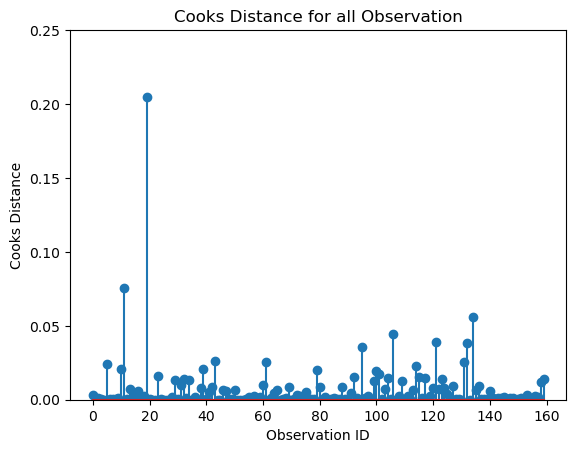

In [401]:
influence = modelMLR.get_influence()
c, p = influence.cooks_distance
plt.stem(np.arange(len(X_train)), c)
plt.title("Cooks Distance for all Observation")
plt.xlabel("Observation ID")
plt.ylabel("Cooks Distance")
plt.ylim(0,0.25)
plt.show()

<p>None of the cook distance is above 1 hence there are no outliers</p>

In [402]:
def compute_vif_factors( X ):
   # X_matrix = X.as_matrix()
    vif_factors = DataFrame()
    vif_factors['column'] = X.columns
    vif = [ variance_inflation_factor( X.values, i ) for i in range( X.shape[1] ) ]
    vif_factors['vif'] = vif
    return vif_factors

In [403]:
vif_factors = compute_vif_factors( X.drop("const", axis = 1) )
vif_factors

,column,vif
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


<p>As there are no features with vif greater than 4, the influence of multicolinearity on the data is low.</p>

<h2>Autocorrelation</h2>

A Durbin-Watson statistic close to 2 indicate the absense of autocorrelation.
The Durbin-Watson statisic is 1.943 for modelMLR. So we can say that there is no autocorrelation.

<h1>Evaluation of Models</h1>

<h2>Training Set</h2>

In [452]:
MSE_SLR = np.mean(np.square(modelSLR.resid))
MSE_MLR = np.mean(np.square(modelMLR.resid)) 
RMSE_SLR = np.sqrt(np.mean(np.square(modelSLR.resid)) )
RMSE_MLR = np.sqrt(np.mean(np.square(modelMLR.resid)) )
MAE_SLR = np.mean(np.abs(modelSLR.resid))
MAE_MLR = np.mean(np.abs(modelMLR.resid)) 
R2_SLR = modelSLR.rsquared
R2_MLR = modelMLR.rsquared


In [453]:
n = len(y_train)
SLR_p = 1
adjusted_R2_SLR = 1 - (1 - R2_SLR) * (n - 1) / (n - SLR_p - 1)

f_stat = (R2_SLR / SLR_p) / ((1 - R2_SLR) / (n - SLR_p - 1))
p_value_SLR = 1 - stats.f.cdf(f_stat, SLR_p, n - SLR_p - 1)
print(p_value_SLR)

1.1102230246251565e-16


In [454]:
MLR_p = 3
adjusted_R2_MLR = 1 - (1 - R2_MLR) * (n - 1) / (n - MLR_p - 1)

f_stat = (R2_MLR / MLR_p) / ((1 - R2_MLR) / (n - MLR_p - 1))
p_value_MLR = 1 - stats.f.cdf(f_stat, MLR_p, n - MLR_p - 1)

In [455]:
metrics = DataFrame({"SLR":[MSE_SLR, RMSE_SLR, MAE_SLR, R2_SLR, adjusted_R2_SLR, p_value_SLR],
                     "MLR":[MSE_MLR, RMSE_MLR, MAE_MLR, R2_MLR, adjusted_R2_MLR, p_value_MLR]},
                    index = ["MSE", "RMSE", "MAE", "R2", "Adjusted R2", "p value"])
metrics = metrics.rename_axis('Metrics')
print("Training Set")
display(metrics)

Training Set


,SLR,MLR
Metrics,,
MSE,5.280368e+00,2.915763e+00
RMSE,2.297905e+00,1.707560e+00
MAE,1.824523e+00,1.259949e+00
R2,7.995053e-01,8.892890e-01
Adjusted R2,7.982363e-01,8.871599e-01
p value,1.110223e-16,1.110223e-16


<h2>Testing Set</h2>

In [456]:
MSE_SLR = mean_squared_error(y_predSLR,y_testSLR) 
MSE_MLR = mean_squared_error(y_predMLR,y_testMLR) 
RMSE_SLR = np.sqrt(mean_squared_error(y_predSLR,y_testSLR))
RMSE_MLR = np.sqrt(mean_squared_error(y_predMLR,y_testMLR))
MAE_SLR = mean_absolute_error(y_predSLR,y_testSLR)
MAE_MLR = mean_absolute_error(y_predMLR,y_testMLR)
R2_SLR = r2_score(y_predSLR,y_testSLR)
R2_MLR = r2_score(y_predMLR,y_testMLR)

In [457]:
n = len(y_test)
SLR_p = 1
adjusted_R2_SLR = 1 - (1 - R2_SLR) * (n - 1) / (n - SLR_p - 1)

f_stat = (R2_SLR / SLR_p) / ((1 - R2_SLR) / (n - SLR_p - 1))
p_value_SLR = 1 - stats.f.cdf(f_stat, SLR_p, n - SLR_p - 1)

In [458]:
n = len(y_test)
MLR_p = 3
adjusted_R2_MLR = 1 - (1 - R2_MLR) * (n - 1) / (n - MLR_p - 1)

f_stat = (R2_MLR / MLR_p) / ((1 - R2_MLR) / (n - MLR_p - 1))
p_value_MLR = 1 - stats.f.cdf(f_stat, MLR_p, n - MLR_p - 1)

In [459]:
metrics = DataFrame({"SLR":[MSE_SLR, RMSE_SLR, MAE_SLR, R2_SLR, adjusted_R2_SLR, p_value_SLR],
                     "MLR":[MSE_MLR, RMSE_MLR, MAE_MLR, R2_MLR, adjusted_R2_MLR, p_value_MLR]},
                    index = ["MSE", "RMSE", "MAE", "R2", "Adjusted R2", "p value"])
metrics = metrics.rename_axis('Metrics')
print("Testing Set")
display(metrics)

Testing Set


,SLR,MLR
Metrics,,
MSE,4.984138e+00,1.947279e+00
RMSE,2.232518e+00,1.395449e+00
MAE,1.856569e+00,1.167959e+00
R2,8.223465e-01,9.459273e-01
Adjusted R2,8.176715e-01,9.414213e-01
p value,7.771561e-16,1.110223e-16


R2 or Adjusted R2: To understand the proportion of variance in sales explained by the advertising budgets. R2 is used to assess how well factors (like advertising budget) explain changes in sales. <br>
RMSE: To evaluate the prediction accuracy of your model in the same units as sales. <br>

<p> As understanding the variance of sales depending on various advertising budgets, R2 and adjusted R2 is the most important metric for this business case</p>

<p> RMSE, MAE and MSE are business critical where the absolute error in predicted value is critical, but the analysis of variance and dependency on features is not that critical, like in demand forecasting and supply chain logistics </p>